In [92]:
import numpy as np
import pandas as pd
import os

In [93]:
# Load recipes data

data_folder = './data'
recipes_file = 'recipes.parquet'

og_data = pd.read_parquet(os.path.join(data_folder, recipes_file))
og_data.head(5)

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,None,"[Toss 2 cups berries with sugar., Let stand fo..."
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,None,[Soak saffron in warm milk for 5 minutes and p...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,None,"[Into a 1 quart Jar with tight fitting lid, pu..."
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"[Drain the tofu, carefully squeezing out exces..."
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,None,"[Mix everything together and bring to a boil.,..."


In [107]:
# Select appropriate columns

print('All columns:', og_data.columns.to_list())

required_columns = ['RecipeId', 'CookTime', 'PrepTime', 'TotalTime',
                    'AggregatedRating', 'ReviewCount', 'Calories', 
                    'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 
                    'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings']

data = og_data[required_columns]

# Remove rows with missing values

print('Number of rows:', len(data))
print('Number of rows without None values:', len(data.dropna()))

data = data.dropna()

data.head(5)

All columns: ['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime', 'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeYield', 'RecipeInstructions']
Number of rows: 522517
Number of rows without None values: 145515


,RecipeId,CookTime,PrepTime,TotalTime,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
0,38.0,PT24H,PT45M,PT24H45M,4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0
1,39.0,PT25M,PT4H,PT4H25M,3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0
2,40.0,PT5M,PT30M,PT35M,4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0
3,41.0,PT20M,PT24H,PT24H20M,4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0
4,42.0,PT30M,PT20M,PT50M,4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0


In [95]:
def timestring_to_minutes(timestring):
    """
    Convert the timestring in the columns 'CookTime', 'PrepTime' or 'TotalTime' to minutes.
    Example: 'PT24H45M' -> 24 * 60 + 45
    
    Args:
        timestring (str): String indicating a time duration
        
    Returns:
        total_time (float): Number of minutes
    """
    if type(timestring) is str:
        # Remove leading 'PT'
        timestring = timestring.replace('PT', '')
        
        # Determine the number of hours from the remaining string before 'H'
        if 'H' in timestring:
            timestring_h = timestring.split('H')
            hours = int(timestring_h[0])
            
            # Consider only the part after 'H' for the minutes
            timestring = timestring_h[1]
        else:
            hours = 0
            
        # Determine the number of minutes from the remaining string before 'M'
        if 'M' in timestring:
            minutes = int(timestring.split('M')[0])
        else:
            minutes = 0
        
        # Calculate the total time duration in minutes
        total_time = hours * 60 + minutes
        return total_time
    else:
        return None

data['CookTime'] = data['CookTime'].map(timestring_to_minutes)
data['PrepTime'] = data['PrepTime'].map(timestring_to_minutes)
data['TotalTime'] = data['TotalTime'].map(timestring_to_minutes)
data = data.astype({'RecipeId': 'int32', 'CookTime': 'int32',
                    'PrepTime': 'int32', 'TotalTime': 'int32'})

print(data.dtypes)
data.head(5)

RecipeId                 int32
CookTime                 int32
PrepTime                 int32
TotalTime                int32
RecipeCategory          object
AggregatedRating       float64
ReviewCount            float64
Calories               float64
FatContent             float64
SaturatedFatContent    float64
CholesterolContent     float64
SodiumContent          float64
CarbohydrateContent    float64
FiberContent           float64
SugarContent           float64
ProteinContent         float64
RecipeServings         float64
dtype: object


,RecipeId,CookTime,PrepTime,TotalTime,RecipeCategory,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
0,38,1440,45,1485,Frozen Desserts,4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0
1,39,25,240,265,Chicken Breast,3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0
2,40,5,30,35,Beverages,4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0
3,41,20,1440,1460,Soy/Tofu,4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0
4,42,30,20,50,Vegetable,4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0


In [96]:
# Look at recipe categories

unique_categories = data['RecipeCategory'].unique()

# Remove 'None' from the categories
unique_categories = unique_categories[unique_categories != np.array(None)]

print('Number of unique categories:', len(unique_categories))
print(data['RecipeCategory'].value_counts())

Number of unique categories: 274
Dessert            14805
One Dish Meal      11456
Lunch/Snacks       10157
Vegetable           8738
Breakfast           7059
                   ...  
Bean Soup              1
Nigerian               1
Breakfast Eggs         1
Canning                1
Black Bean Soup        1
Name: RecipeCategory, Length: 274, dtype: int64


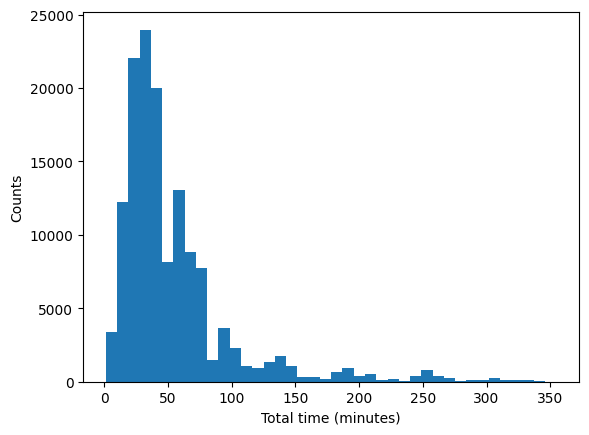

In [97]:
# Plot (part of) distribution of total time

import matplotlib.pyplot as plt

plt.hist(data[data['TotalTime'] < 6 * 60]['TotalTime'], bins=40)
plt.ylabel('Counts')
plt.xlabel('Total time (minutes)')
plt.show()

In [98]:
#og_data['RecipeInstructions'][3]

In [99]:
sum((data['PrepTime'] < 120) & (data['CookTime'] < 180))

133400

(array([26., 23., 38., 44., 48., 25., 35., 21.,  9.,  5.]),
 array([0.        , 0.41704084, 0.83408168, 1.25112252, 1.66816336,
        2.08520421, 2.50224505, 2.91928589, 3.33632673, 3.75336757,
        4.17040841]),
 <BarContainer object of 10 artists>)

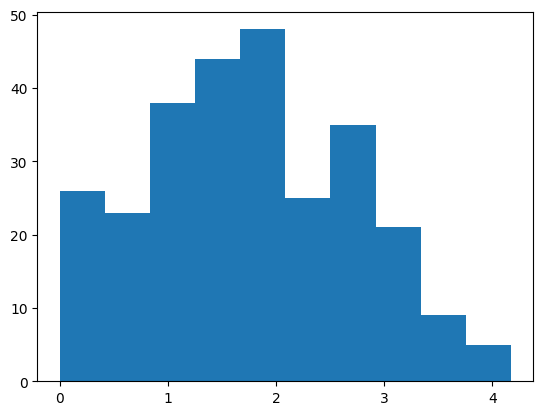

In [100]:
plt.hist(np.log10(data['RecipeCategory'].value_counts()))

In [101]:
sum((data['PrepTime'] < 120) & (data['CookTime'] < 180))

133400

In [102]:
data.describe()

,RecipeId,CookTime,PrepTime,TotalTime,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,145363.000000,1.453630e+05,145363.000000,1.453630e+05,145363.000000,145363.000000,145363.000000,145363.000000,145363.00000,145363.000000,145363.000000,145363.000000,145363.000000,145363.000000,145363.000000,145363.000000
mean,224475.161740,1.581202e+02,33.710071,1.918346e+02,4.616921,5.312452,371.119965,18.735190,7.22446,76.132228,590.804455,33.856629,3.138610,11.773142,17.205572,8.869272
std,141996.118984,2.984439e+04,1443.574950,3.003686e+04,0.648521,22.340973,397.682555,28.776871,10.61553,109.175863,2585.703973,43.300951,4.791035,25.805539,22.382921,150.626859
min,38.000000,1.000000e+00,-30.000000,1.000000e+00,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,102113.500000,1.500000e+01,10.000000,2.500000e+01,4.500000,1.000000,183.200000,6.200000,1.60000,10.200000,152.000000,12.600000,0.900000,2.200000,4.100000,4.000000
50%,210573.000000,2.500000e+01,15.000000,4.100000e+01,5.000000,2.000000,304.000000,13.200000,4.60000,51.300000,364.200000,26.800000,2.100000,5.300000,10.600000,6.000000
75%,337225.000000,4.500000e+01,20.000000,7.000000e+01,5.000000,4.000000,466.200000,24.100000,9.70000,105.600000,729.200000,44.900000,4.000000,13.500000,26.300000,8.000000
max,540899.000000,1.135872e+07,525600.000000,1.139472e+07,5.000000,3063.000000,41770.200000,4701.100000,992.10000,11823.800000,704129.600000,4320.900000,835.700000,3623.900000,3270.300000,32767.000000


In [103]:
print('All columns:', og_data.columns.to_list())
og_data.iloc[data['Calories'][data['Calories'] > 10000].sort_values().tail(10).index][['Calories', 'Name']]

All columns: ['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime', 'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeYield', 'RecipeInstructions']


,Calories,Name
41525,12110.9,Coconut Macaroons
63717,12176.2,Walnut Baklava
495906,12571.5,Popeye's Popcorn Shrimp and Chicken
79850,14789.4,Crock Pot Duck Confit
433612,15309.6,Bikers Spanish Meatballs &ldquo;albondigas&rdquo;
517196,17551.6,Granny Jones' Secret Salty Sweet Biscuit Recipe
326026,21497.8,Alternate Honey Barbecue Sauce With Riblets (A...
141506,30933.4,Seasoned Goldfish Crackers
55534,38680.1,Scott Hibb's Amazing Whiskey Grilled Baby Back...
364899,41770.2,New Orleans Beignets


In [104]:
print(sum((data['Calories'] < 10000) & ((data['PrepTime'] <= 120) & (data['CookTime'] <= 180))))
temp_filter = (data['Calories'] < 10000) & (data['PrepTime'] <= 120) & (data['CookTime'] <= 180) & \
                (data['SodiumContent'] <= 5000)

136089


In [105]:
data[temp_filter].describe()

,RecipeId,CookTime,PrepTime,TotalTime,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,135636.000000,135636.000000,135636.000000,135636.000000,135636.000000,135636.000000,135636.000000,135636.000000,135636.000000,135636.000000,135636.000000,135636.000000,135636.000000,135636.000000,135636.000000,135636.000000
mean,224774.102923,33.106041,16.333621,49.446047,4.620086,5.253008,362.294644,18.257314,7.075854,74.532952,523.074229,33.469965,3.092289,11.522709,16.520117,8.044089
std,141823.447803,30.844594,14.317297,35.744133,0.645911,21.520493,309.280615,21.467395,8.908924,94.071086,554.797919,36.381207,4.537115,21.797757,17.264980,13.820233
min,40.000000,1.000000,-30.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,102640.250000,15.000000,10.000000,25.000000,4.500000,1.000000,181.800000,6.200000,1.600000,10.200000,149.800000,12.700000,0.900000,2.200000,4.100000,4.000000
50%,211118.500000,25.000000,15.000000,40.000000,5.000000,2.000000,301.300000,13.200000,4.600000,50.100000,355.900000,26.800000,2.100000,5.300000,10.300000,6.000000
75%,337637.750000,45.000000,20.000000,60.000000,5.000000,4.000000,461.800000,23.900000,9.600000,103.800000,711.400000,45.000000,4.000000,13.400000,25.600000,8.000000
max,540899.000000,180.000000,120.000000,600.000000,5.000000,3063.000000,9973.800000,1095.200000,355.000000,3800.000000,4996.700000,2153.200000,835.700000,1954.700000,690.200000,3800.000000


In [106]:
sum((data[temp_filter]['CookTime'] + data[temp_filter]['PrepTime'] != data[temp_filter]['TotalTime']))

12

In [110]:
og_data[og_data['RecipeServings'].isna()].head(10)

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
8,46.0,A Jad - Cucumber Pickle,1533,Dancer,None,PT25M,PT25M,1999-08-11 19:48:00,Make and share this A Jad - Cucumber Pickle re...,[],...,0.0,0.0,0.7,1.1,0.2,0.2,0.1,NaN,1 cup,"[Slice the cucumber in four lengthwise, then s..."
9,47.0,Butter Pecan Cookies,1573,benluc,PT9M,PT55M,PT1H4M,1999-09-07 09:01:00,Make and share this Butter Pecan Cookies recip...,[https://img.sndimg.com/food/image/upload/w_55...,...,1.4,6.3,15.0,4.5,0.6,1.6,0.8,NaN,84 cookies,"[Preheat oven to 350 degrees., Cream butter in..."
12,50.0,Biscotti Di Prato,1752,Bob Ross,PT50M,PT20M,PT1H10M,1999-08-31 21:19:00,Make and share this Biscotti Di Prato recipe f...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.3,16.6,23.5,14.5,0.8,7.3,2.3,NaN,56 biscotti,"[EGG WASH 1 Egg, large 1 tsp Water In the bowl..."
15,53.0,Jimmy G's Carrot Cake,1772,Jimg2040,PT45M,PT1H5M,PT1H50M,1999-09-08 15:39:00,Make and share this Jimmy G's Carrot Cake reci...,[],...,3.2,62.0,190.0,66.2,3.4,40.9,6.6,NaN,None,[Grease and lightly flour 2 9x1 1/2-inch round...
23,61.0,Brownie Heart Cake,1555,Cindy Hartlin,PT42M,PT35M,PT1H17M,1999-09-07 14:15:00,Make and share this Brownie Heart Cake recipe ...,[],...,144.2,1097.5,2157.8,509.9,29.0,392.5,71.7,NaN,1 Large cake,[CAKE: Grease 5 cup heart shaped pan; dust wi...
27,66.0,Black Coffee Barbecue Sauce,174711,Queen Dragon Mom,PT20M,PT10M,PT30M,1999-09-10 21:43:00,It's great to know folks like this sauce so mu...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.5,0.0,2241.9,189.6,6.4,164.3,7.0,NaN,1 1/2 cups,[Combine all ingredients in a saucepan and sim...
30,69.0,Chicha Peruana,1595,Enrique1,PT1H50M,PT2H45M,PT4H35M,1999-08-14 06:20:00,Chicha (corn beer). Chicha is made in South an...,[],...,0.0,0.0,3.6,2.7,1.5,0.0,2.7,NaN,1 batch,"[Procedure: Mash for 90 minutes at 160°F., We ..."
31,70.0,Buckwheat Bread,1547,Morton Design Graph,PT3H,PT35M,PT3H35M,1999-08-24 04:19:00,Make and share this Buckwheat Bread recipe fro...,[],...,7.1,379.4,2717.0,466.9,57.5,30.2,97.8,NaN,1 large loaf,[Proof the yeast in the lukewarm water with th...
34,73.0,Bratwurst,1547,Morton Design Graph,PT1H,PT50M,PT1H50M,1999-08-22 05:04:00,"Although they can be made with a fine grind, w...",[],...,27.6,418.3,1519.1,28.3,6.6,11.1,113.3,NaN,10 pounds (4.5 kg),[Grind the veal and pork with a 3/8 in. (0.95...
38,78.0,Buttermilk Ranch Dressing,1582,Diana van den Broek,None,PT20M,PT20M,1999-08-18 04:20:00,Make and share this Buttermilk Ranch Dressing ...,[],...,12.8,46.4,577.9,14.1,0.3,7.7,8.2,NaN,1 1/4 cups,[Mash together garlic and salt to form a paste...
